In [1]:
import sys
import pickle
import pandas as pd
import numpy as np

sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

/Users/dan/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".'to_messages', 'email_address', 'from_poi_to_this_person',

In [2]:
features_list=["poi","loan_advances","from_messages","deferred_income",'from_this_person_to_poi',"expenses",
               "deferral_payments","restricted_stock_deferred","long_term_incentive","other"]

features_list_full = ['poi','salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus',
                   'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses',
                   'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees','to_messages'
    , 'from_poi_to_this_person',
                'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

### Load the dictionary containing the dataset

In [3]:
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Data Exploration

In [4]:


#Total number of data points
print len(data_dict)


146


In [5]:
#Allocation across POI and non-POI
poi_count=0
poi_list=[]
for k, v in data_dict.items():
    for key, value in v.items():
        if key=="poi" and value==True:
            poi_count+=1
            poi_list.append(k)
print poi_count
print poi_list
            

18
['HANNON KEVIN P', 'COLWELL WESLEY', 'RIEKER PAULA H', 'KOPPER MICHAEL J', 'SHELBY REX', 'DELAINEY DAVID W', 'LAY KENNETH L', 'BOWEN JR RAYMOND M', 'BELDEN TIMOTHY N', 'FASTOW ANDREW S', 'CALGER CHRISTOPHER F', 'RICE KENNETH D', 'SKILLING JEFFREY K', 'YEAGER F SCOTT', 'HIRKO JOSEPH', 'KOENIG MARK E', 'CAUSEY RICHARD A', 'GLISAN JR BEN F']


In [6]:
non_poi_list=[]
for name in data_dict.keys():
    if name not in poi_list:
        non_poi_list.append(name)

In [7]:
print non_poi_list, len(non_poi_list)

['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HORTON STANLEY C', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'UMANOFF ADAM S', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'LEMAISTRE CHARLES', 'DEFFNER JOSEPH M', 'KISHKILL JOSEPH G', 'WHALLEY LAWRENCE G'

In [8]:
import pandas as pd
df=pd.DataFrame.from_records(list(data_dict.values()))
employees=pd.Series(list(data_dict.keys()))

df.set_index(employees,inplace=True)
print df.head()
new_features=df.columns.values

                    bonus deferral_payments deferred_income director_fees  \
METTS MARK         600000               NaN             NaN           NaN   
BAXTER JOHN C     1200000           1295738        -1386055           NaN   
ELLIOTT STEVEN     350000               NaN         -400729           NaN   
CORDES WILLIAM R      NaN               NaN             NaN           NaN   
HANNON KEVIN P    1500000               NaN        -3117011           NaN   

                             email_address exercised_stock_options expenses  \
METTS MARK            mark.metts@enron.com                     NaN    94299   
BAXTER JOHN C                          NaN                 6680544    11200   
ELLIOTT STEVEN    steven.elliott@enron.com                 4890344    78552   
CORDES WILLIAM R     bill.cordes@enron.com                  651850      NaN   
HANNON KEVIN P      kevin.hannon@enron.com                 5538001    34039   

                 from_messages from_poi_to_this_person  \
METT

From above output, we can see that a lot of "NaN"s are in the dataset. 

In [9]:
df_new=df.apply(lambda  x: pd.to_numeric(x, errors='coerce')).copy()



print df_new.replace('NaN',0, inplace=True)

None


In [10]:
print df_new.columns

Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'email_address', u'exercised_stock_options', u'expenses',
       u'from_messages', u'from_poi_to_this_person',
       u'from_this_person_to_poi', u'loan_advances', u'long_term_incentive',
       u'other', u'poi', u'restricted_stock', u'restricted_stock_deferred',
       u'salary', u'shared_receipt_with_poi', u'to_messages',
       u'total_payments', u'total_stock_value'],
      dtype='object')


In [11]:
print df_new

                          bonus  deferral_payments  deferred_income  \
METTS MARK             600000.0                0.0              0.0   
BAXTER JOHN C         1200000.0          1295738.0       -1386055.0   
ELLIOTT STEVEN         350000.0                0.0        -400729.0   
CORDES WILLIAM R            0.0                0.0              0.0   
HANNON KEVIN P        1500000.0                0.0       -3117011.0   
MORDAUNT KRISTINA M    325000.0                0.0              0.0   
MEYER ROCKFORD G            0.0          1848227.0              0.0   
MCMAHON JEFFREY       2600000.0                0.0              0.0   
HORTON STANLEY C            0.0          3131860.0              0.0   
PIPER GREGORY F        400000.0          1130036.0         -33333.0   
HUMPHREY GENE E             0.0          2964506.0              0.0   
UMANOFF ADAM S         788750.0                0.0              0.0   
BLACHMAN JEREMY M      850000.0                0.0              0.0   
SUNDE 

/Users/dan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


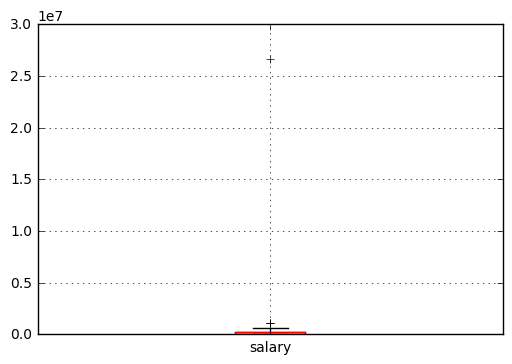

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
bp=df_new.boxplot(column="salary")

Found the outlier. Then we have to find which data point is the outlier.

In [13]:
for i in range(len(df_new)):
    if df_new.iloc[i]["salary"]>2000000:
        print i

104


Look for the outlier.

In [14]:
print df_new.iloc[104]

bonus                        9.73436e+07
deferral_payments            3.20834e+07
deferred_income             -2.79929e+07
director_fees                1.39852e+06
email_address                          0
exercised_stock_options      3.11764e+08
expenses                      5.2352e+06
from_messages                          0
from_poi_to_this_person                0
from_this_person_to_poi                0
loan_advances                 8.3925e+07
long_term_incentive          4.85219e+07
other                        4.26676e+07
poi                                False
restricted_stock             1.30322e+08
restricted_stock_deferred   -7.57679e+06
salary                       2.67042e+07
shared_receipt_with_poi                0
to_messages                            0
total_payments               3.09887e+08
total_stock_value             4.3451e+08
Name: TOTAL, dtype: object


In [15]:
df_new.drop(df_new.index[104],inplace=True)

In [16]:
print df_new

                          bonus  deferral_payments  deferred_income  \
METTS MARK             600000.0                0.0              0.0   
BAXTER JOHN C         1200000.0          1295738.0       -1386055.0   
ELLIOTT STEVEN         350000.0                0.0        -400729.0   
CORDES WILLIAM R            0.0                0.0              0.0   
HANNON KEVIN P        1500000.0                0.0       -3117011.0   
MORDAUNT KRISTINA M    325000.0                0.0              0.0   
MEYER ROCKFORD G            0.0          1848227.0              0.0   
MCMAHON JEFFREY       2600000.0                0.0              0.0   
HORTON STANLEY C            0.0          3131860.0              0.0   
PIPER GREGORY F        400000.0          1130036.0         -33333.0   
HUMPHREY GENE E             0.0          2964506.0              0.0   
UMANOFF ADAM S         788750.0                0.0              0.0   
BLACHMAN JEREMY M      850000.0                0.0              0.0   
SUNDE 

/Users/dan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


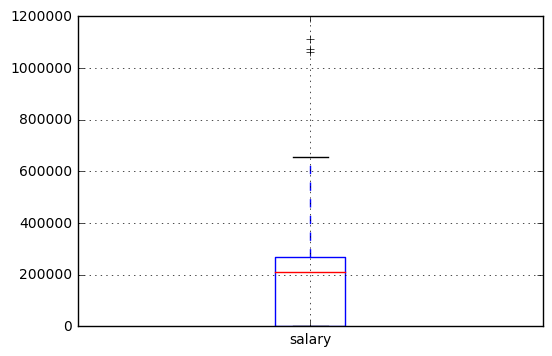

In [17]:
bp=df_new.boxplot(column="salary")

In [18]:
poi_df= df_new.groupby('poi')


In [19]:
print poi_df["salary"].mean()

poi
False    158942.251969
True     362142.388889
Name: salary, dtype: float64


In [20]:
print poi_df["bonus"].mean()

poi
False    5.050679e+05
True     1.844444e+06
Name: bonus, dtype: float64


Populating the interactive namespace from numpy and matplotlib


poi
False    Axes(0.125,0.125;0.775x0.775)
True     Axes(0.125,0.125;0.775x0.775)
Name: salary, dtype: object

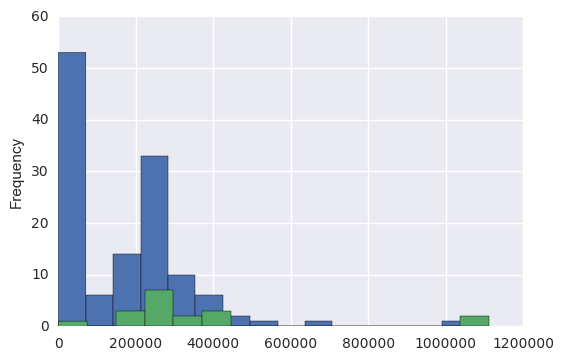

In [21]:
import seaborn as sns
%pylab inline
import matplotlib.pyplot as plt
poi_df["salary"].plot.hist(bins=15)

poi
False    Axes(0.125,0.125;0.775x0.775)
True     Axes(0.125,0.125;0.775x0.775)
Name: bonus, dtype: object

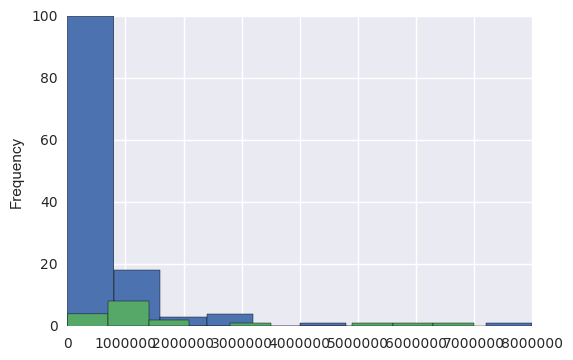

In [22]:
poi_df["bonus"].plot.hist(bins=10,stacked=True)

poi
False    Axes(0.125,0.125;0.775x0.775)
True     Axes(0.125,0.125;0.775x0.775)
Name: director_fees, dtype: object

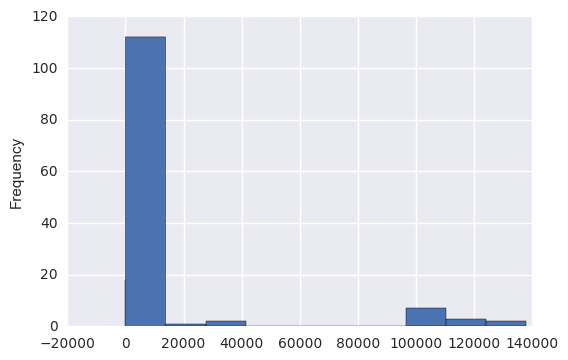

In [23]:
poi_df["director_fees"].plot.hist(bins=10,stacked=True)

poi
False    Axes(0.125,0.125;0.775x0.775)
True     Axes(0.125,0.125;0.775x0.775)
Name: exercised_stock_options, dtype: object

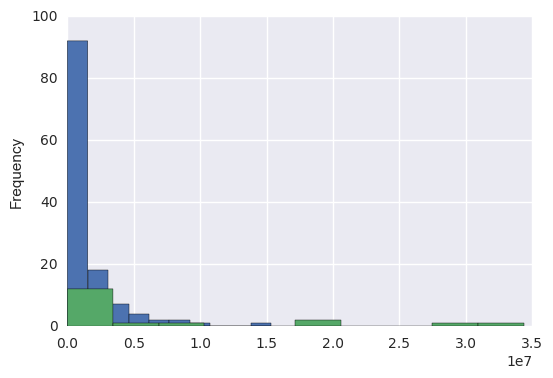

In [24]:
poi_df["exercised_stock_options"].plot.hist(bins=10,stacked=True)

poi
False    Axes(0.125,0.125;0.775x0.775)
True     Axes(0.125,0.125;0.775x0.775)
Name: total_stock_value, dtype: object

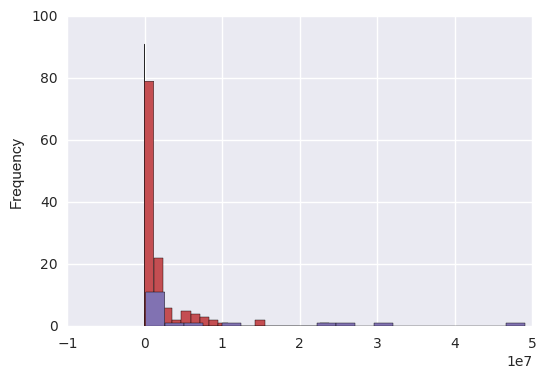

In [25]:
poi_df["from_poi_to_this_person"].plot.hist(bins=20,stacked=True)

poi_df["total_stock_value"].plot.hist(bins=20,stacked=True)

poi
False    Axes(0.125,0.125;0.775x0.775)
True     Axes(0.125,0.125;0.775x0.775)
Name: expenses, dtype: object

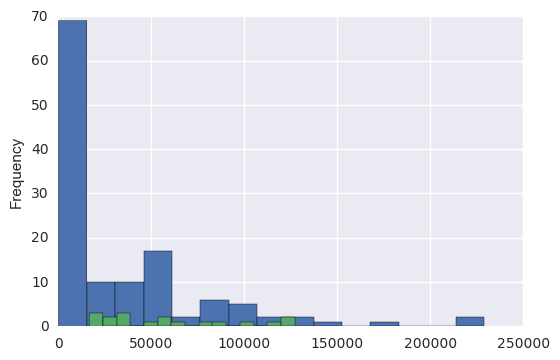

In [26]:
poi_df["expenses"].plot.hist(bins=15,stacked=True)

poi
False    Axes(0.125,0.125;0.775x0.775)
True     Axes(0.125,0.125;0.775x0.775)
Name: long_term_incentive, dtype: object

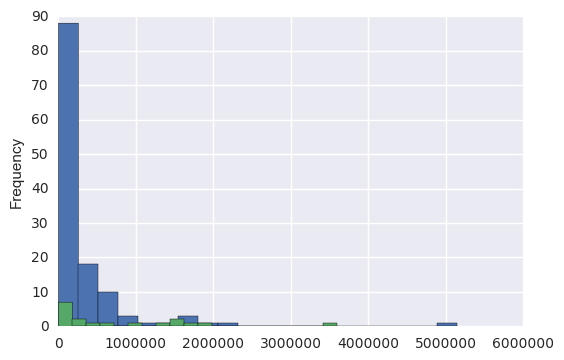

In [27]:
poi_df["long_term_incentive"].plot.hist(bins=20,stacked=True)

poi
False    Axes(0.125,0.125;0.775x0.775)
True     Axes(0.125,0.125;0.775x0.775)
dtype: object

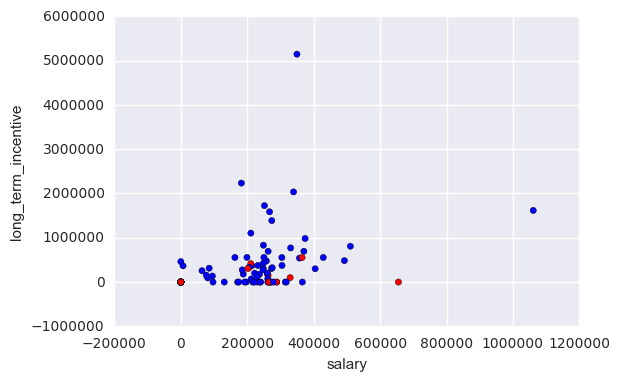

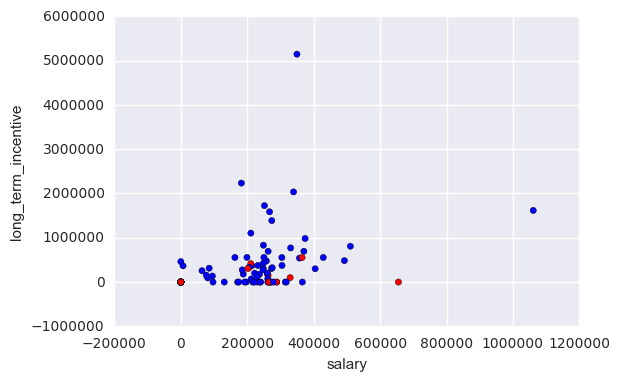

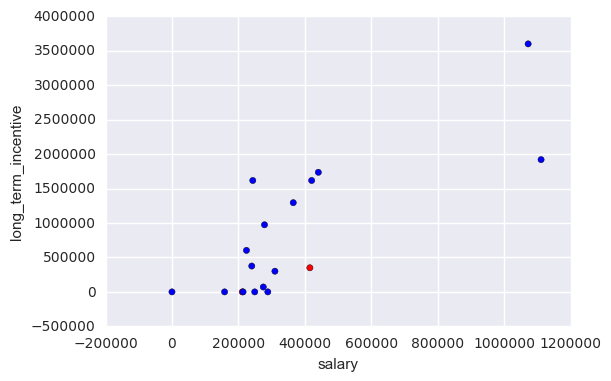

In [28]:
colors=np.where(df_new.poi==True,'r','b')
poi_df.plot.scatter(x="salary",y='long_term_incentive',c=colors)

poi
False    Axes(0.125,0.125;0.775x0.775)
True     Axes(0.125,0.125;0.775x0.775)
dtype: object

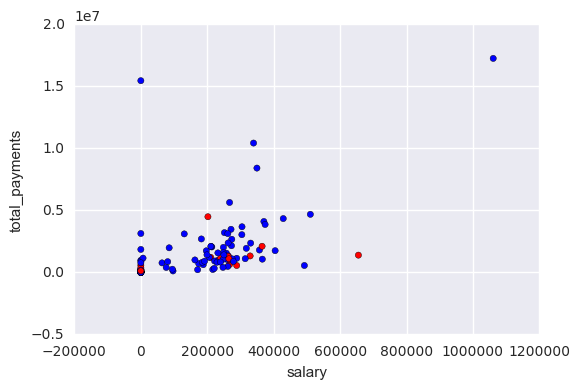

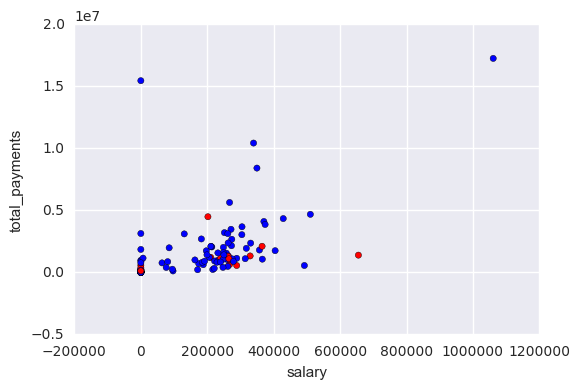

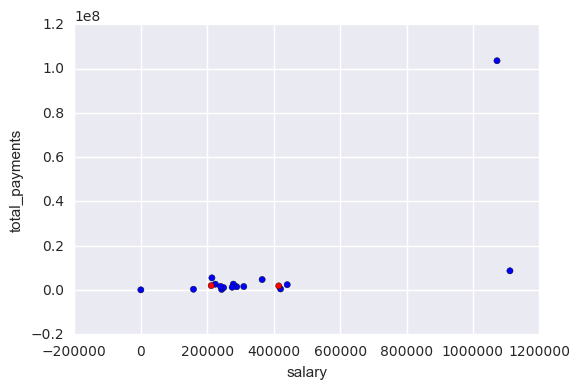

In [29]:
colors=np.where(df_new.poi==True,'r','b')
poi_df.plot.scatter(x="salary",y='total_payments',c=colors)

poi
False    Axes(0.125,0.125;0.775x0.775)
True     Axes(0.125,0.125;0.775x0.775)
dtype: object

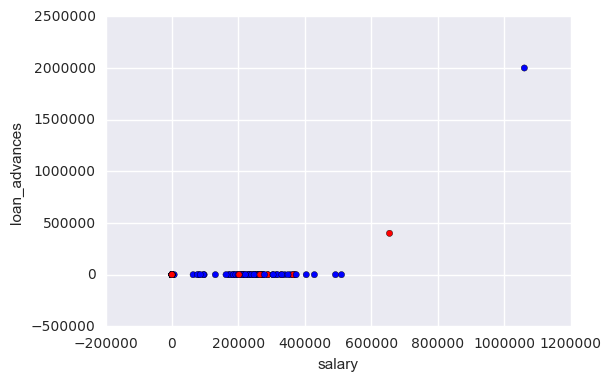

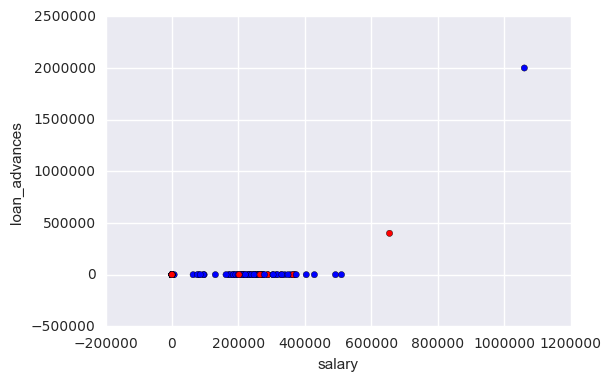

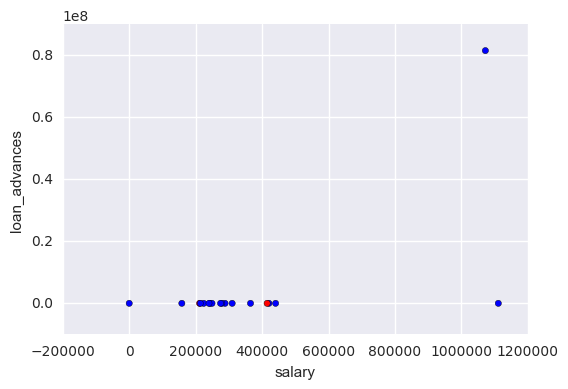

In [30]:
colors=np.where(df_new.poi==True,'r','b')
poi_df.plot.scatter(x="salary",y='loan_advances',c=colors)

poi
False    Axes(0.125,0.125;0.775x0.775)
True     Axes(0.125,0.125;0.775x0.775)
dtype: object

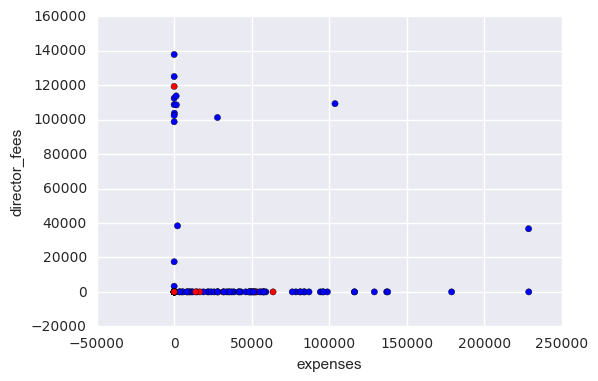

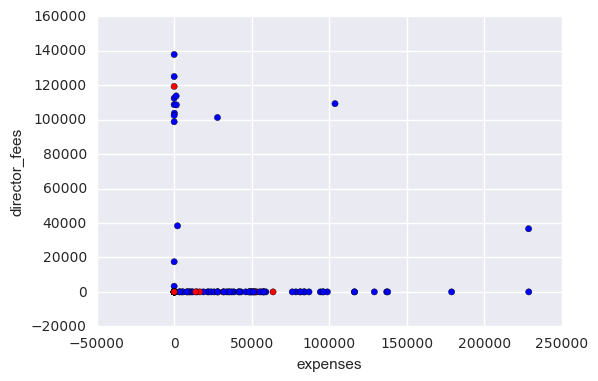

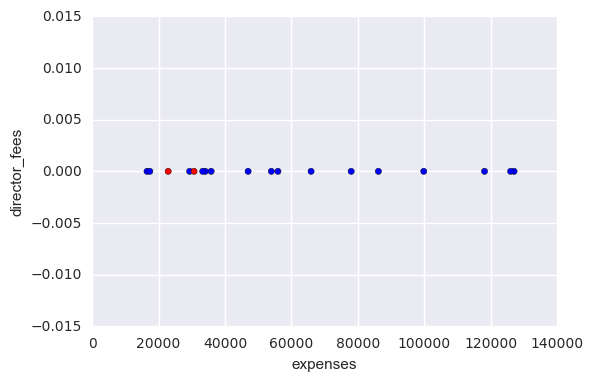

In [31]:
colors=np.where(df_new.poi==True,'r','b')
poi_df.plot.scatter(x="expenses",y='director_fees',c=colors)

poi
False    Axes(0.125,0.125;0.775x0.775)
True     Axes(0.125,0.125;0.775x0.775)
dtype: object

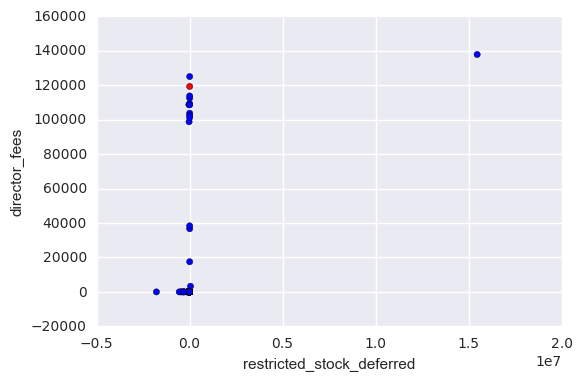

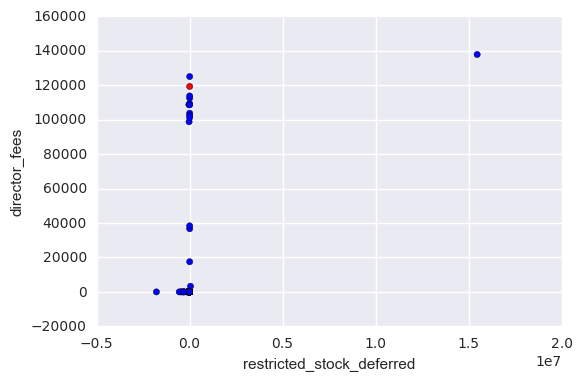

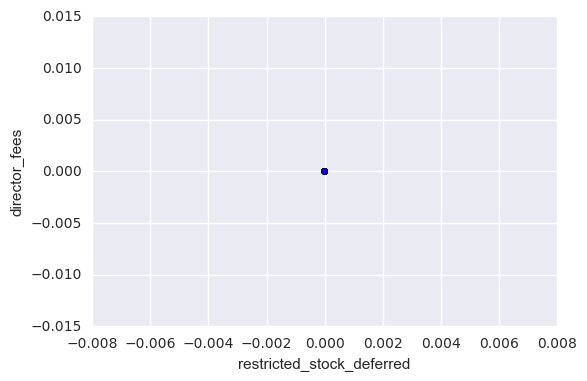

In [32]:
colors=np.where(df_new.poi==True,'r','b')
poi_df.plot.scatter(x="restricted_stock_deferred",y='director_fees',c=colors)

poi
False    Axes(0.125,0.125;0.775x0.775)
True     Axes(0.125,0.125;0.775x0.775)
dtype: object

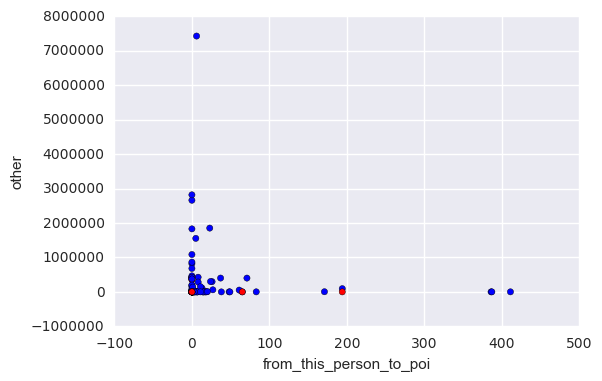

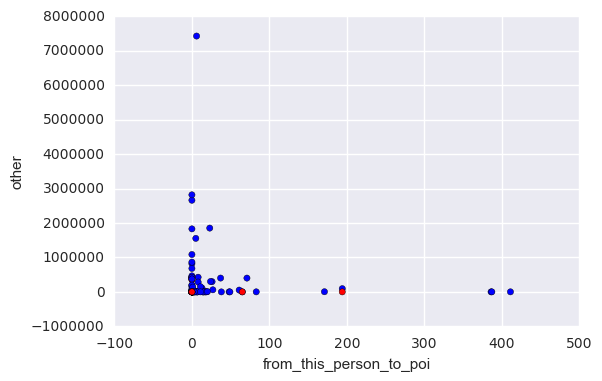

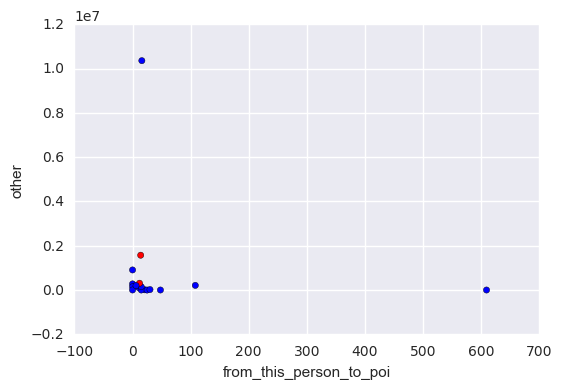

In [33]:
colors=np.where(df_new.poi==True,'r','b')
poi_df.plot.scatter(x="from_this_person_to_poi",y='other',c=colors)

poi
False    Axes(0.125,0.125;0.775x0.775)
True     Axes(0.125,0.125;0.775x0.775)
dtype: object

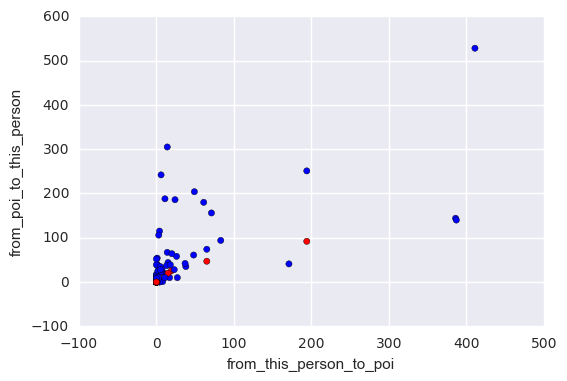

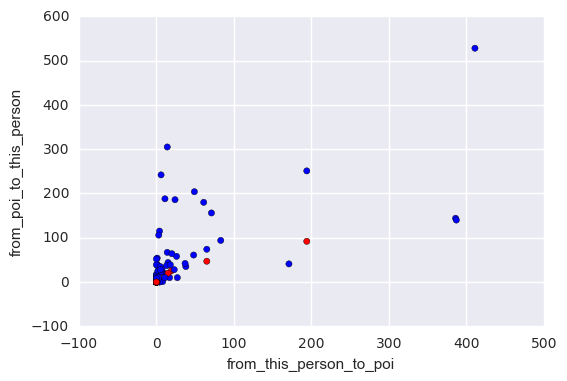

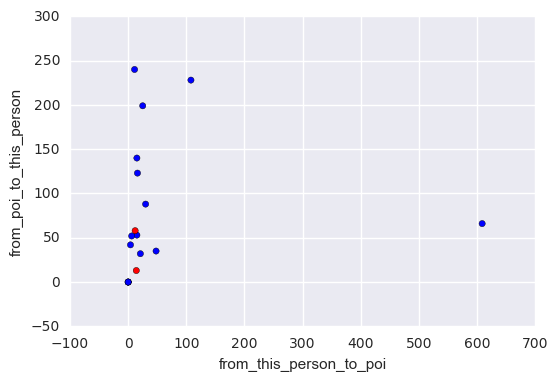

In [34]:
poi_df.plot.scatter(x="from_this_person_to_poi",y='from_poi_to_this_person',c=colors)

Use SelectKBest to help select best features.

## Task 2: Remove outliers

In [35]:
data_dict.pop("TOTAL",0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

### Task 3: Create new feature(s)

In [36]:
### Store to my_dataset for easy export below.

### Cast my_dataset into DataFrame to replace all 'NaN's with number 0, and then cast back into a dictionary called df_dict.

my_dataset = data_dict

print len(my_dataset)

df=pd.DataFrame.from_records(list(data_dict.values()))
employees=pd.Series(list(data_dict.keys()))

df.set_index(employees,inplace=True)
print df.head()
new_features=df.columns.values

print "*************************************"

df_new=df.apply(lambda  x: pd.to_numeric(x, errors='coerce')).copy()



print df_new.replace('NaN',0, inplace=True)

print "==================================="




145
                    bonus deferral_payments deferred_income director_fees  \
METTS MARK         600000               NaN             NaN           NaN   
BAXTER JOHN C     1200000           1295738        -1386055           NaN   
ELLIOTT STEVEN     350000               NaN         -400729           NaN   
CORDES WILLIAM R      NaN               NaN             NaN           NaN   
HANNON KEVIN P    1500000               NaN        -3117011           NaN   

                             email_address exercised_stock_options expenses  \
METTS MARK            mark.metts@enron.com                     NaN    94299   
BAXTER JOHN C                          NaN                 6680544    11200   
ELLIOTT STEVEN    steven.elliott@enron.com                 4890344    78552   
CORDES WILLIAM R     bill.cordes@enron.com                  651850      NaN   
HANNON KEVIN P      kevin.hannon@enron.com                 5538001    34039   

                 from_messages from_poi_to_this_person  \


### Create new features

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
min_max_scaler=MinMaxScaler()

df_new['scaled_loan_advances']=min_max_scaler.fit_transform(df_new["loan_advances"])

df_new['scaled_deferred_income']=min_max_scaler.fit_transform(df_new["deferred_income"])

df_new['scaled_from_this_person_to_poi']=min_max_scaler.fit_transform(df_new["from_this_person_to_poi"])

df_new['scaled_expenses']=min_max_scaler.fit_transform(df_new["expenses"])

df_new["scaled_features_total"]=2*df_new["scaled_loan_advances"]+df_new["scaled_deferred_income"]+0.8*df_new["scaled_from_this_person_to_poi"]+0.5*df_new["scaled_expenses"]



/Users/dan/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/dan/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/dan/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your dat

In [39]:
new_features_list=df.columns.values
df_dict=df_new.to_dict("index")
print df_new.head()

                      bonus  deferral_payments  deferred_income  \
METTS MARK         600000.0                0.0              0.0   
BAXTER JOHN C     1200000.0          1295738.0       -1386055.0   
ELLIOTT STEVEN     350000.0                0.0        -400729.0   
CORDES WILLIAM R        0.0                0.0              0.0   
HANNON KEVIN P    1500000.0                0.0       -3117011.0   

                  director_fees  email_address  exercised_stock_options  \
METTS MARK                  0.0            0.0                      0.0   
BAXTER JOHN C               0.0            0.0                6680544.0   
ELLIOTT STEVEN              0.0            0.0                4890344.0   
CORDES WILLIAM R            0.0            0.0                 651850.0   
HANNON KEVIN P              0.0            0.0                5538001.0   

                  expenses  from_messages  from_poi_to_this_person  \
METTS MARK         94299.0           29.0                     38.0   
BAXTER

In [40]:
from sklearn.feature_selection import SelectKBest
from collections import defaultdict
from sklearn.cross_validation import train_test_split


data = featureFormat(df_dict, features_list_full, sort_keys = True)
labels, features = targetFeatureSplit(data)

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3)
selector= SelectKBest(k='all')
selector.fit(features_train, labels_train)

sel_features = features_list_full[1:]
print sel_features
print len(sel_features)
score_dict=defaultdict(dict)
for i in range(len(sel_features)):
    score=selector.scores_[i]
    pvalues=selector.pvalues_[i]
    score_dict[features_list_full[i]]={"score":score}
from operator import itemgetter
for k, v in sorted(score_dict.items(), key=itemgetter(1)):
    print k, v

['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees', 'to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']
19
director_fees {'score': 0.060372049182933263}
bonus {'score': 0.088353916723137402}
from_messages {'score': 0.31037820729506083}
from_poi_to_this_person {'score': 0.73688126712860924}
restricted_stock {'score': 1.2943678146390607}
salary {'score': 1.3537194602204372}
restricted_stock_deferred {'score': 1.8962100996593902}
from_this_person_to_poi {'score': 1.9932215403528297}
to_messages {'score': 2.6518642091585294}
exercised_stock_options {'score': 3.9657649525793515}
other {'score': 5.3162129288268041}
total_payments {'score': 6.4168315880569828}
deferral_payments {'score': 6.7248083462772517}
loan_advances {'score': 8.61

### Extract features and labels from dataset for local testing

In [41]:
data = featureFormat(df_dict, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

In [42]:
features_list=["poi","loan_advances","from_messages","deferred_income",'from_this_person_to_poi',"expenses",
               "deferral_payments","restricted_stock_deferred","long_term_incentive","other"]

Try Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3)

dump_classifier_and_data(clf, my_dataset, features_list)

import pickle
import sys
from sklearn.cross_validation import StratifiedShuffleSplit
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

def test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    cv = StratifiedShuffleSplit(labels, folds)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii])
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append(features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."

CLF_PICKLE_FILENAME = "my_classifier.pkl"
DATASET_PICKLE_FILENAME = "my_dataset.pkl"
FEATURE_LIST_FILENAME = "my_feature_list.pkl"

def dump_classifier_and_data(clf, dataset, feature_list):
    with open(CLF_PICKLE_FILENAME, "w") as clf_outfile:
        pickle.dump(clf, clf_outfile)
    with open(DATASET_PICKLE_FILENAME, "w") as dataset_outfile:
        pickle.dump(dataset, dataset_outfile)
    with open(FEATURE_LIST_FILENAME, "w") as featurelist_outfile:
        pickle.dump(feature_list, featurelist_outfile)

def load_classifier_and_data():
    with open(CLF_PICKLE_FILENAME, "r") as clf_infile:
        clf = pickle.load(clf_infile)
    with open(DATASET_PICKLE_FILENAME, "r") as dataset_infile:
        dataset = pickle.load(dataset_infile)
    with open(FEATURE_LIST_FILENAME, "r") as featurelist_infile:
        feature_list = pickle.load(featurelist_infile)
    return clf, dataset, feature_list

def main():
    ### load up student's classifier, dataset, and feature_list
    clf, dataset, feature_list = load_classifier_and_data()
    ### Run testing script
    test_classifier(clf, dataset, feature_list)

if __name__ == '__main__':
    main()

GaussianNB(priors=None)
	Accuracy: 0.53879	Precision: 0.18984	Recall: 0.68200	F1: 0.29701	F2: 0.44913
	Total predictions: 14000	True positives: 1364	False positives: 5821	False negatives:  636	True negatives: 6179



In [44]:
feature_list=["poi","loan_advances","from_messages","deferred_income",'from_this_person_to_poi',"expenses",
               "deferral_payments","restricted_stock_deferred","long_term_incentive"]

In [45]:
features_list=["poi","loan_advances","from_messages","deferred_income",'from_this_person_to_poi',"expenses","total_payments","exercised_stock_options",
               "deferral_payments","restricted_stock_deferred","long_term_incentive","other","director_fees","bonus"]

In [46]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3)

dump_classifier_and_data(clf, my_dataset, features_list)


if __name__ == '__main__':
    main()

GaussianNB(priors=None)
	Accuracy: 0.59007	Precision: 0.18977	Recall: 0.63450	F1: 0.29216	F2: 0.43201
	Total predictions: 15000	True positives: 1269	False positives: 5418	False negatives:  731	True negatives: 7582



Try different feature lists

In [47]:
features_list=["poi","loan_advances","from_messages","deferred_income",'from_this_person_to_poi',"expenses","total_payments","exercised_stock_options",
               "deferral_payments","restricted_stock_deferred","long_term_incentive","other","director_fees","bonus","from_messages"]

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3)

dump_classifier_and_data(clf, my_dataset, features_list)



if __name__ == '__main__':
    main()

GaussianNB(priors=None)
	Accuracy: 0.53293	Precision: 0.18300	Recall: 0.72250	F1: 0.29204	F2: 0.45452
	Total predictions: 15000	True positives: 1445	False positives: 6451	False negatives:  555	True negatives: 6549



In [48]:
features_list=["poi","loan_advances","from_messages","deferred_income",'from_this_person_to_poi',"expenses","total_payments","exercised_stock_options",
               "deferral_payments","restricted_stock_deferred","long_term_incentive","other","director_fees","bonus","to_messages","from_poi_to_this_person"]

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3)

dump_classifier_and_data(clf, my_dataset, features_list)



if __name__ == '__main__':
    main()

GaussianNB(priors=None)
	Accuracy: 0.60640	Precision: 0.20361	Recall: 0.67050	F1: 0.31237	F2: 0.45969
	Total predictions: 15000	True positives: 1341	False positives: 5245	False negatives:  659	True negatives: 7755



I've noticed, with Naive Bayes, I can get pretty good recall but precision is pretty low, at most 0.2-ich. So I'd try another algorithm, random forest.

In [49]:
features_list=["poi","loan_advances","from_messages","deferred_income",'from_this_person_to_poi',"expenses","total_payments","exercised_stock_options",
               "deferral_payments","restricted_stock_deferred","long_term_incentive","other","director_fees","bonus","to_messages","from_poi_to_this_person"]

from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier()


features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3)

dump_classifier_and_data(clf, my_dataset, features_list)



if __name__ == '__main__':
    main()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.86207	Precision: 0.44143	Recall: 0.13000	F1: 0.20085	F2: 0.15136
	Total predictions: 15000	True positives:  260	False positives:  329	False negatives: 1740	True negatives: 12671



In [50]:
features_list=["poi","loan_advances","from_messages","deferred_income",'from_this_person_to_poi',"expenses","total_payments","exercised_stock_options",
               "deferral_payments","restricted_stock_deferred"]


clf = RandomForestClassifier()


features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3)

dump_classifier_and_data(clf, my_dataset, features_list)



if __name__ == '__main__':
    main()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.86853	Precision: 0.52077	Recall: 0.17550	F1: 0.26253	F2: 0.20233
	Total predictions: 15000	True positives:  351	False positives:  323	False negatives: 1649	True negatives: 12677



In [51]:
features_list=["poi","loan_advances","from_messages","deferred_income",'from_this_person_to_poi',"expenses","total_payments","exercised_stock_options",
               "deferral_payments"]


clf = RandomForestClassifier()


features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3)

dump_classifier_and_data(clf, my_dataset, features_list)



if __name__ == '__main__':
    main()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.87067	Precision: 0.55455	Recall: 0.15250	F1: 0.23922	F2: 0.17836
	Total predictions: 15000	True positives:  305	False positives:  245	False negatives: 1695	True negatives: 12755



In [52]:
features_list=["poi","loan_advances","from_messages","deferred_income",'from_this_person_to_poi',"expenses",
               "deferral_payments","restricted_stock_deferred","long_term_incentive","other"]


clf = RandomForestClassifier()

from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3)

dump_classifier_and_data(clf, my_dataset, features_list)



if __name__ == '__main__':
    main()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.84707	Precision: 0.35815	Recall: 0.08900	F1: 0.14257	F2: 0.10474
	Total predictions: 14000	True positives:  178	False positives:  319	False negatives: 1822	True negatives: 11681



Try to tune some features for Random Forest algorithm

In [53]:
features_list=["poi","loan_advances","from_messages","deferred_income",'from_this_person_to_poi',"expenses",
               "deferral_payments","restricted_stock_deferred","long_term_incentive","other"]


clf = RandomForestClassifier(min_samples_split=5,max_features=0.5)


features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3)

dump_classifier_and_data(clf, my_dataset, features_list)



if __name__ == '__main__':
    main()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.84371	Precision: 0.36761	Recall: 0.13050	F1: 0.19262	F2: 0.14983
	Total predictions: 14000	True positives:  261	False positives:  449	False negatives: 1739	True negatives: 11551



In [54]:
features_list=["poi","loan_advances","from_messages","deferred_income",'from_this_person_to_poi',"expenses",
               "deferral_payments","restricted_stock_deferred","long_term_incentive","other"]


clf = RandomForestClassifier(min_samples_split=5,max_features=0.6)


features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3)

dump_classifier_and_data(clf, my_dataset, features_list)



if __name__ == '__main__':
    main()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.6, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.84386	Precision: 0.36752	Recall: 0.12900	F1: 0.19097	F2: 0.14824
	Total predictions: 14000	True positives:  258	False positives:  444	False negatives: 1742	True negatives: 11556



In [55]:
features_list=["poi","loan_advances","from_messages","deferred_income",'from_this_person_to_poi',"expenses",
               "deferral_payments","restricted_stock_deferred","long_term_incentive","other"]


clf = RandomForestClassifier(min_samples_split=5,max_features=0.65)


features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3)

dump_classifier_and_data(clf, my_dataset, features_list)



if __name__ == '__main__':
    main()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.65, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.84107	Precision: 0.35595	Recall: 0.13900	F1: 0.19993	F2: 0.15830
	Total predictions: 14000	True positives:  278	False positives:  503	False negatives: 1722	True negatives: 11497



I'd like to try Decision Tree now.

In [56]:
# Provided to give you a starting point. Try a variety of classifiers.

from sklearn import tree
clf = tree.DecisionTreeClassifier()



dump_classifier_and_data(clf, my_dataset, features_list)



if __name__ == '__main__':
    main()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.80221	Precision: 0.30492	Recall: 0.30050	F1: 0.30269	F2: 0.30137
	Total predictions: 14000	True positives:  601	False positives: 1370	False negatives: 1399	True negatives: 10630



Finally something that seems to be working. I'll try to tune some features.

In [57]:
# Provided to give you a starting point. Try a variety of classifiers.


clf = tree.DecisionTreeClassifier(criterion='entropy')
dump_classifier_and_data(clf, my_dataset, features_list)



if __name__ == '__main__':
    main()

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.82271	Precision: 0.37071	Recall: 0.34550	F1: 0.35766	F2: 0.35026
	Total predictions: 14000	True positives:  691	False positives: 1173	False negatives: 1309	True negatives: 10827



Something that is satisfactory in both precision and recall. Hurray!

In [58]:
clf = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=30)
dump_classifier_and_data(clf, my_dataset, features_list)

if __name__ == '__main__':
    main()

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=30, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.83721	Precision: 0.41711	Recall: 0.35100	F1: 0.38121	F2: 0.36249
	Total predictions: 14000	True positives:  702	False positives:  981	False negatives: 1298	True negatives: 11019



Things are getting even better. But I still wanna tune features further, just for fun :)

In [59]:

clf = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=20,max_features=0.65 )

dump_classifier_and_data(clf, my_dataset, features_list)





if __name__ == '__main__':
    main()

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=0.65, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.83414	Precision: 0.38912	Recall: 0.28250	F1: 0.32735	F2: 0.29888
	Total predictions: 14000	True positives:  565	False positives:  887	False negatives: 1435	True negatives: 11113



In [60]:

clf = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=30,max_features=0.66,random_state=24 )



dump_classifier_and_data(clf, my_dataset, features_list)



if __name__ == '__main__':
    main()

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=0.66, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=30, min_weight_fraction_leaf=0.0,
            presort=False, random_state=24, splitter='best')
	Accuracy: 0.85293	Precision: 0.48355	Recall: 0.43350	F1: 0.45716	F2: 0.44266
	Total predictions: 14000	True positives:  867	False positives:  926	False negatives: 1133	True negatives: 11074



WOW! Both precision and recall are above 0.40!

In [61]:

clf = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=20,max_features=0.66,random_state=25 )



dump_classifier_and_data(clf, my_dataset, features_list)



if __name__ == '__main__':
    main()

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=0.66, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=25, splitter='best')
	Accuracy: 0.83707	Precision: 0.41354	Recall: 0.33600	F1: 0.37076	F2: 0.34909
	Total predictions: 14000	True positives:  672	False positives:  953	False negatives: 1328	True negatives: 11047



## MY FINAL CLASSIFIER

In [62]:
clf = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=20,max_features=0.66,random_state=24 )



dump_classifier_and_data(clf, my_dataset, features_list)



if __name__ == '__main__':
    main()

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=0.66, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=24, splitter='best')
	Accuracy: 0.86050	Precision: 0.51365	Recall: 0.44200	F1: 0.47514	F2: 0.45469
	Total predictions: 14000	True positives:  884	False positives:  837	False negatives: 1116	True negatives: 11163



So now we have multiple tuned features that work as required. 

### Check the performance of the new feature that I created (NOT THE FINAL CLASSIFIER)

In [63]:
features_list=["poi","scaled_features_total"]

data = featureFormat(df_dict, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

clf = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split=20,max_features=0.66,random_state=24 )

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3)

dump_classifier_and_data(clf, df_dict, features_list)



if __name__ == '__main__':
    main()


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=0.66, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=24, splitter='best')
	Accuracy: 0.82593	Precision: 0.27910	Recall: 0.19300	F1: 0.22820	F2: 0.20569
	Total predictions: 15000	True positives:  386	False positives:  997	False negatives: 1614	True negatives: 12003



In [64]:
print my_dataset

{'METTS MARK': {'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38}, 'BAXTER JOHN C': {'salary': 267102, 'to_messages': 'NaN', 'deferral_payments': 1295738, 'total_payments': 5634343, 'exercised_stock_options': 6680544, 'bonus': 1200000, 'restricted_stock': 3942714, 'shared_receipt_with_poi': 'NaN', 'restricted_stock_deferred': 'NaN', 'total_stock_value': 10623258, 'expenses': 11200, 'loan_advances': 'NaN', 'from_messages': 'NaN', 'other': 2660303, 'from_this_person_to_poi': 'NaN', 'poi': False, 'direct

## Answer to Questions
### Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it.

The goal of this project is to teach us the end-to-end process of investigating data through a machine learning lens. It teaches us how to extract and identify useful features that best represent the data, a few of the most commonly used machine learning algorithms today, and how to evaluate the performance of our machine learning algorithms.




### What features did you end up using in your POI identifier, and what selection process did you use to pick them?

I used 'loan_advances', 'from_messages', 'deferred_income', 'from_this_person_to_poi', 'expenses', 'deferral_payments', 'restricted_stock_deferred', 'long_term_incentive', 'other' in my POI identifier. I used SelectKBest from sklearn.feature_selection to help with the picking of them. After printing out the score from SelectKBest, I manually tested with various possible combination of features and algorithm and attributes. I didn't use scaling, because for the three algorithms that tested in the project, no scaled features are required. 

The new feature I created were based on the score printed out by feature_selection, then I used float numbers to adjust the importance of each feature that I used. I thought the new feature would perform well, however, it didn't. But maybe that's because I only tried decision tree, as in my final algorithm. 





### What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms? 

I ended up using decision tree, which has both good precision and recall values. I also tried Naive Bayes and Random Forest. Naive Bayes has pretty high recall score but pretty low precision, while Random Forest has relative high precision score but rather low recall score.

### What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? 

Tuning the parameters of an algorithm means to try different values for parameters to make the algorithm perform better. I tried different values for different for each algorithm that I used. However, I also noticed one thing. For certain algorithm (namely Random Forest), no matter how I tuned the parameters, it's very hard to get the low value much higher. I mean, when I used Random Forest, no matter how I changed the paramters, recall score was constantly low. Things got much more intersting when I tuned the parameters for Decision Trees. I could see that the best possible value for max_features is 0.66. 

Following is the table of feature tuning for decision trees.

criterion  min_sample_split max_features  random_state  precision   recall      Decision
    
    
 Default     Default        Default       Default       0.29251    0.31050     Promising algorithm
   
 entropy     Default        Default       Default       0.34694    0.32300   p and r up, keeping "entropy"
   
 entropy      10            Default       Default       0.33650    0.23050  p and r down, try a bigger number
   
 entropy      20            Default       Default       0.41089    0.34700  p and r up, try a bigger number
   
 entropy      30            Default       Default       0.38430    0.33300  p and r down, keeping "20"
   
 entropy      20             0.5          Default       0.35069    0.25250  p and r down, try a bigger float
          
 entropy      20             0.6          Default       0.3710     0.27250  p and r up, try a bigger float
   
 entropy      20             0.7          Default       0.37195    0.29700 p and r up, try a fixed random_state
   
 entropy      20             0.7          1             0.39747    0.34500 p and r up, try a different number
   
 entropy      20             0.7          24            0.36139    0.36500 p down, r up, try a different max_features
 
 entropy      20             0.6          24           0.51242     0.44350 Pretty good p and r, keeping as final

### What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?

Cross Validation is a model validation technique for assessing how the algorithm will generalize and to overcome the problem of overfitting in the training set. If we do it wrong, we can run into a classic mistake of overfitting. I used import train_test_split in sklearn.cross_validation to do the validations.

Overfitting occurs in machine learning when we have very good evaluation results for test set, but very bad evaluation results for test set. Intuitively, overfitting occurs when the model or the algorithm fits the data too well.  Specifically, overfitting occurs if the model or algorithm shows low bias but high variance.  Overfitting is often a result of an excessively complicated model, and it can be prevented by fitting multiple models and using validation or cross-validation to compare their predictive accuracies on test data.


### Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance.

I used precision and recall as my evalution metrics. Precision means out of all the examples that the classifier labeled as positive, what fraction were correct? Recall out of all the positive examples, what proportion did the classifier pick up. 

The average accuracy is around 0.85, the average precision is around 0.47, and the average recall is around 0.427.


Reference:

https://tryolabs.com/blog/2013/03/25/why-accuracy-alone-bad-measure-classification-tasks-and-what-we-can-do-about-it/

In [77]:
features_list=features_list_full

In [120]:
# For sklearn 0.17 or older
# splits = StratifiedShuffleSplit(labels, n_iter = 1000, random_state=42)
from sklearn.model_selection import StratifiedShuffleSplit
import pprint
sss = StratifiedShuffleSplit(n_splits = 1000, random_state=42)


k = 10 


# We will include all the features into variable best_features, then group by their
# occurrences.
features_scores = {}


# For sklearn 0.17 or older
# for i_train, i_test in splits:


for i_train, i_test in sss.split(features, labels):
    features_train, features_test = [features[i] for i in i_train], [features[i] for i in i_test]
    labels_train, labels_test = [labels[i] for i in i_train], [labels[i] for i in i_test]


    # fit selector to training set
    selector = SelectKBest(k = "all")
    selector.fit(features_train, labels_train)


    # Get scores of each feature:
    #print features_list
    sel_features = np.array(features_list_full[1:])[selector.get_support()]
    #print sel_features
    sel_list = []
    for i in range(len(sel_features)):
        sel_list.append([sel_features[i], selector.scores_[i],selector.pvalues_[i]])
    
    #print sel_list
    
     
    


    # Fill to feature_scores dictionary
    for feat, score, pvalue in sel_list:
        #print feat
        if feat not in features_scores:
            features_scores[feat] = {'scores': [], 'pvalues': []}
        features_scores[feat]['scores'].append(score)
        features_scores[feat]['pvalues'].append(pvalue)


# Average scores and pvalues of each feature
features_scores_l = [] # tuple of feature name, avg scores, avg pvalues
for feat in features_scores:
    #print feat
    features_scores_l.append((
        feat,
        np.mean(features_scores[feat]['scores']),
        np.mean(features_scores[feat]['pvalues'])
    ))


# Sort by scores and display
import operator
sorted_feature_scores = sorted(features_scores_l, key=operator.itemgetter(1), reverse=True)
sorted_feature_scores_str = ["{}, {}, {}".format(x[0], x[1], x[2]) for x in sorted_feature_scores]



print "feature, score, pvalue"
pprint.pprint(sorted_feature_scores_str)

/Users/dan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:32: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19 but corresponding boolean dimension is 1


feature, score, pvalue
['salary, 1.35475014816, 0.345314766085']


In [118]:
print features_list


['poi', 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees', 'to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']


In [85]:
print features_scores

{'salary': {'pvalues': [0.27958647191765967, 0.44248594157645238, 0.089056470483458938, 0.28685911505265194, 0.16004506050084424, 0.35621103781922892, 0.50418372639066078, 0.90998549479345736, 0.9487243422041276, 0.43128852897472225, 0.22663874351694838, 0.53384736057541904, 0.3544195094249617, 0.10431178972070081, 0.75852009620690852, 0.33874682053729233, 0.080807666592612515, 0.045295600030450127, 0.11079808493277984, 0.2769524868152814, 0.23169805818505571, 0.31110057594650681, 0.20918804224171056, 0.27832330106852055, 0.13874538245140683, 0.05208823288879523, 0.37234619738730634, 0.086382084494965233, 0.37596968490172988, 0.14792916907954687, 0.54466876017353028, 0.75167552771079582, 0.092593166399347573, 0.37761097475807548, 0.12545523868060832, 0.091068140890816454, 0.051395004150708905, 0.65321167023429716, 0.90044392147759789, 0.45687253595063959, 0.12991907186533871, 0.28914398774138311, 0.61382075645736733, 0.15758899173788474, 0.55804892560555286, 0.35533481471808726, 0.3717